In [1]:
import pandas as pd
import math
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
def read_task_set_from_txt(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [3]:
def readap(file):
    task_set = []
    with open(file, 'r') as txtfile:
        for line in txtfile:
            task = tuple(map(int, line.strip()[1:-1].split(', ')))
            task_set.append(task)
    return task_set

In [4]:
def uti(df):
    u=sum(df['execution'] / df['period'])
    return u
        

In [5]:
task_set = read_task_set_from_txt("task_set.txt")
data = task_set
df = pd.DataFrame(data, columns=['id', 'execution', 'arrival', 'period', 'dead'])
df = df.drop(columns=['dead'])
df

,id,execution,arrival,period
0,1,10,0,255
1,2,25,0,364
2,3,24,0,482
3,4,29,0,324
4,5,18,0,352
5,6,15,0,400
6,7,15,0,237
7,8,24,0,206
8,9,13,0,355
9,10,12,0,299


In [6]:
utilization=uti(df)
bud=(int)((1-utilization)*100)
ind=len(df)
deff_sever={'id':ind+1,'execution':bud,'arrival':0,'period':250,'dead':60}
df.loc[ind]=deff_sever
df['rem']=df['execution']
df['nextdead']=df['period']
df['budget'] = df['execution']
print(bud)
df

8


,id,execution,arrival,period,rem,nextdead,budget
0,1,10,0,255,10,255,10
1,2,25,0,364,25,364,25
2,3,24,0,482,24,482,24
3,4,29,0,324,29,324,29
4,5,18,0,352,18,352,18
5,6,15,0,400,15,400,15
6,7,15,0,237,15,237,15
7,8,24,0,206,24,206,24
8,9,13,0,355,13,355,13
9,10,12,0,299,12,299,12


In [7]:
task_setap = readap("APtask_set.txt")
data = task_setap
dfap = pd.DataFrame(data, columns=['id','execution','arrival'])
apt=[]

dfap.sort_values('arrival',inplace=True)


In [8]:
sc=[]
ap=[]

In [9]:
apin=0
for i in range(500):
    task = df[(df["arrival"] <= i) & (df["rem"] > 0)]
    aptask=dfap[(dfap['arrival']<=i) & (dfap['execution']>0)]
    if len(task)>0:
        nexttask=task.sort_values('nextdead').index[0]
        if(df.loc[nexttask,'id']==ind+1):
            if len(aptask)>0 & apin<len(dfap): 
                nextap=dfap.index[apin]
                df.loc[nexttask, "rem"] -= 1.0
                dfap.loc[nextap,'execution']-=1
                if(dfap.loc[nextap,'execution']==0):
                    apin+=1
                    
                if ap and i > 0 and ap[-1]['id'] == dfap.loc[nextap, "id"] and ap[-1]['end time'] == i:
                    ap[-1]['end time'] += 1
                    ap[-1]['total time'] += 1
                else:
                    dict={'id': dfap.loc[nextap, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                    ap.append(dict)

                if sc and i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                    sc[-1]['end time'] += 1
                    sc[-1]['total time'] += 1
                else:
                    dict={'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                    sc.append(dict) 
                
        else: 
            df.loc[nexttask, "rem"] -= 1.0
            if sc and i > 0 and sc[-1]['id'] == df.loc[nexttask, "id"] and sc[-1]['end time'] == i:
                sc[-1]['end time'] += 1
                sc[-1]['total time'] += 1
            else:
                dict={'id': df.loc[nexttask, "id"], 'start time': i, 'end time': i + 1, 'total time': 1}
                sc.append(dict) 
            
            
        
            
    arrived=df[(i+1)%df['period']==0].index
    df.loc[arrived, 'rem'] = df.loc[arrived, 'execution']
    df.loc[arrived, 'nextdead'] = df.loc[arrived, 'nextdead']+df.loc[arrived,'period']
    
    #print("i=",i)
    #print(df)


In [10]:
sc1=pd.DataFrame(sc)
sc1

,id,start time,end time,total time
0,15,0,20,20
1,8,20,44,24
2,7,44,59,15
3,16,59,67,8
4,1,67,77,10
5,10,77,89,12
6,4,89,118,29
7,5,118,136,18
8,9,136,149,13
9,2,149,151,2


In [11]:
ap1=pd.DataFrame(ap)
ap1

,id,start time,end time,total time
0,2,59,67,8
1,2,363,371,8


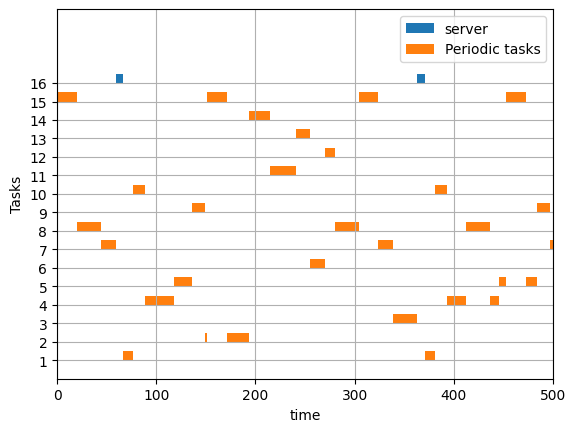

In [12]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots()
gnt.set_ylim(0, 10*(ind+5))
gnt.set_xlim(0, 500)
gnt.set_xlabel('time')
gnt.set_ylabel('Tasks')
blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
orange_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:orange", edgecolor='none')
tick=10
tc=[]
lab=[]
for i in df['id']:
    tc.append(tick)
    lab.append(i)
    tick+=10

gnt.set_yticks(tc)
gnt.set_yticklabels(lab)
gnt.grid(True)

for item in sc:
    if(item['id']==ind+1): 
        gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:blue'))
    else: 
        gnt.broken_barh([(item['start time'], item['end time']-item['start time'])], (10*item['id'], 5), facecolors =('tab:orange'))
gnt.legend([blue_patch, orange_patch], [ 'server','Periodic tasks'], loc='upper right')

plt.show()

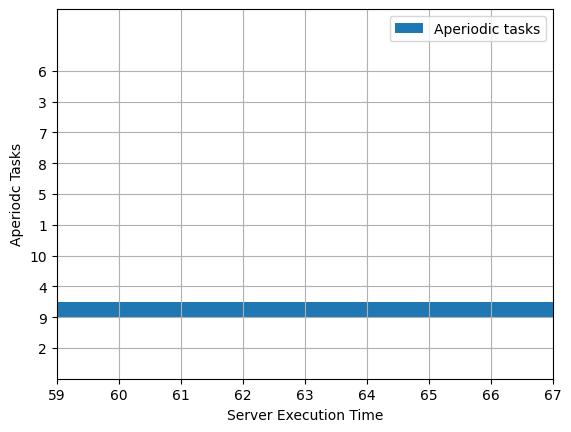

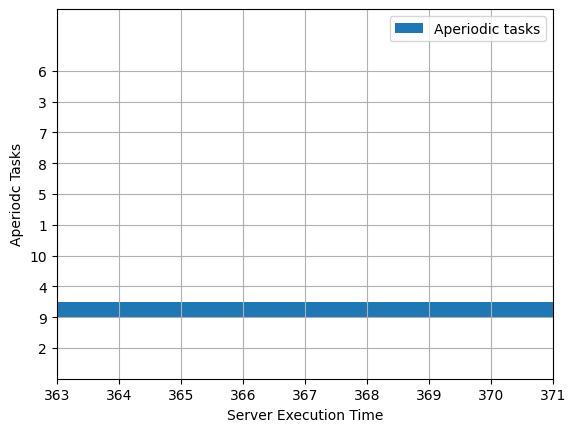

In [13]:
import matplotlib.pyplot as plt
for i in sc:
    if i['id'] == ind + 1: 
        fig, gnt = plt.subplots()
        gnt.set_ylim(0, 10 * (len(dfap) + 2))
        gnt.set_xlim(i['start time'], i['end time'])
        gnt.set_xlabel('Server Execution Time')
        gnt.set_ylabel('Aperiodc Tasks')
        tick = 10
        tc = []
        lab = []
        for j in dfap['id']:
            tc.append(tick)
            lab.append(j)
            tick += 10
        gnt.set_yticks(tc)
        gnt.set_yticklabels(lab)
        gnt.grid(True)
        blue_patch = plt.Rectangle((0, 0), 1, 1, fc="tab:blue", edgecolor='none')
        gnt.legend([blue_patch], ['Aperiodic tasks'], loc='upper right')
        for item in ap:
            if i['start time'] <= item['start time'] and item['end time'] <= i['end time']:
                gnt.broken_barh([(item['start time'], item['end time'] - item['start time'])],
                                (10 * item['id'], 5), facecolors=('tab:blue'))
plt.show()
